# Tutorial for Conductivity module

In [1]:
# import the necessary packages along with HavNegpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import HavNegpy as dd
%matplotlib qt

In [2]:
# extract the data

filename = 'cond_example_data.txt'
col_names = ['Freq','Sig1','Sig2']
df = pd.read_csv(filename, sep='\t',index_col=False,usecols = [0,1,2],names=col_names,header=None,skiprows=10,encoding='unicode_escape',engine='python')



## Fitting the real part of Conductivity

In [3]:
# plot the data 

x = np.log10(df['Freq'])
y = np.log10(df['Sig1'])
plt.scatter(x,y,label='example data')
plt.xlabel('log f [Hz]')
plt.ylabel('log ( $\sigma´$)')
plt.legend()
plt.title('Example for Conductivity fitting')

Text(0.5, 1.0, 'Example for Conductivity fitting')

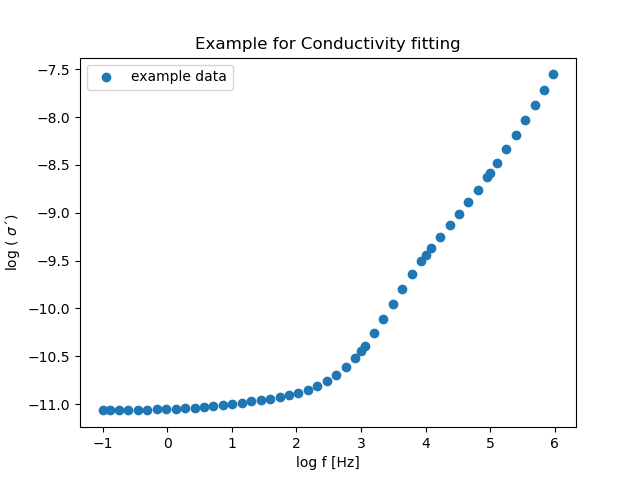

In [4]:
# instantiate the HN module
cond = dd.Conductivity()

**Select the region of interest (ROI) to fit the data using the select range method**. <br>
The data in ROI is shown as image in the next cell

In [5]:
#select range
x1,y1 = cond.select_range(x,y)

x_lower_limit -1.039386875850182 x_upper_limit 5.614181794555549


**Plot of the ROI for fitting**

In [6]:
plt.scatter(x1,y1)
plt.xlabel('log f [Hz]')
plt.ylabel('log ( $\sigma´$)')

Text(0, 0.5, 'log ( $\\sigma´$)')

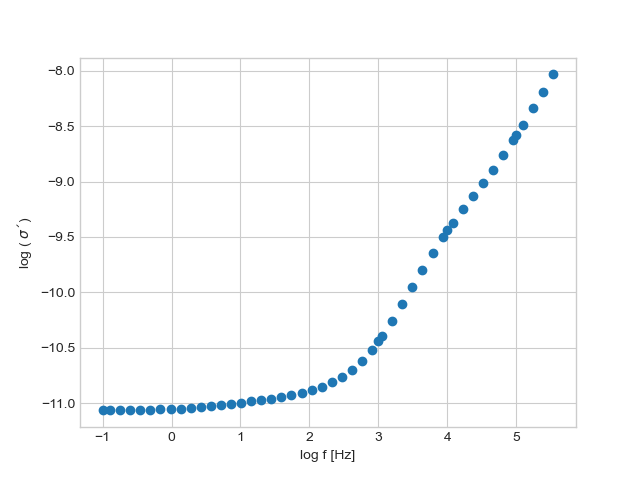

In [7]:
#dump the initial guess parameters using dump parameters method (varies for each fn), which dumps the parameters in a json file'
#this is required before performing the first fitting as it takes the initial guess from the json file created
cond.dump_parameters()


enter the fc value:3
enter the DC conductivity value:-10
enter the exponent:0.8
dumped_parameters {'fc': 1000.0, 'DC': -10.0, 'n': 0.8}


()

In [8]:
# perform least squares fitting
# the plot is shown as a image in the next cell

cond.fit(x1,y1)


fit parameters:
 [274.40483973 -11.04255983   0.97224746]
 DC cond = -11.043
fit parameters dumped for next iteration {'fc': 274.4048397299556, 'DC': -11.04255983252695, 'n': 0.9722474585471939}


()

**Plot of the final fit**
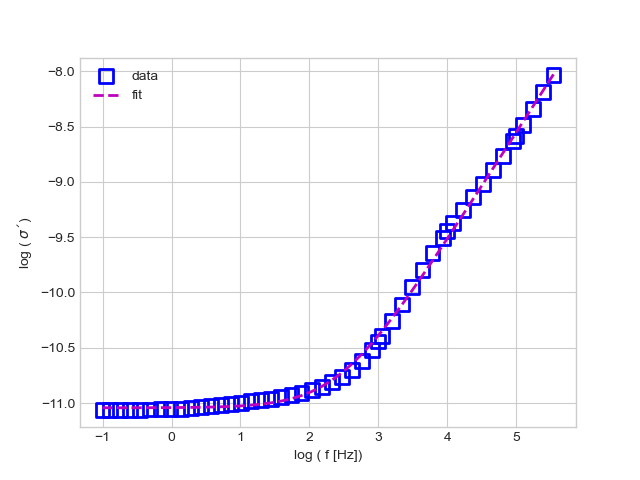


In [9]:
# before saving fit results an analysis file has to be created using create_analysis file method

cond.create_analysis_file()


Do you want to use an existing file to save fit results? 
 eg: existing file to save HN parameters, y or n:y
Enter the analysis_file_name:cond_fit.TXT
file exists


()

In [10]:
#save the fit results using save_fit method of the corresponding fit function
#takes one argument, read more on the documentation

cond.save_fit(1)

()